---
<img src = '../logo_dh_grupo3.png'>

# <h1><left><ins>Entrenamiento y Evaluación de modelos

## Importación de librerías y bases de datos

In [1]:
pip install imblearn

Note: you may need to restart the kernel to use updated packages.


In [2]:
# Importamos las librerias relevantes
import imblearn
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn 

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
# Importamos las bases de datos

data_0 = pd.read_csv("base_entrenamiento.csv")

In [5]:
# Cantidad de filas y columnas

data_0.shape

(30360, 22)

La base de datos tiene 30,360 observaciones de 21 columnas.

In [6]:
# Nombre y tipo de columnas, ademas de cantidad de filas no nulas

data_0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30360 entries, 0 to 30359
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   housing               30360 non-null  int64  
 1   loan                  30360 non-null  int64  
 2   contact               30360 non-null  int64  
 3   campaign              30360 non-null  int64  
 4   emp.var.rate          30360 non-null  float64
 5   cons.price.idx        30360 non-null  float64
 6   cons.conf.idx         30360 non-null  float64
 7   euribor3m             30360 non-null  float64
 8   nr.employed           30360 non-null  float64
 9   y                     30360 non-null  int64  
 10  married               30360 non-null  int64  
 11  month_cat             30360 non-null  int64  
 12  age_cat_(34.0, 44.0]  30360 non-null  int64  
 13  age_cat_(44.0, 69.0]  30360 non-null  int64  
 14  job_cat_1             30360 non-null  int64  
 15  job_cat_2          

Hay 10 variables numéricas y 11 categóricas.

In [7]:
# Separamos la variable target (y)
X = data_0.drop('y', axis = 1)

y = data_0['y']

In [8]:
# Separamos el dataset en Train y Test:

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.30,
                                                   random_state = 42,
                                                   stratify = y)

In [9]:

from sklearn.preprocessing import StandardScaler

sd = StandardScaler()

In [10]:
# Estandarizamos las variables continuas:
variables_continuas = ['campaign', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m',
                       'nr.employed']

X_train[variables_continuas] = sd.fit_transform(X_train[variables_continuas])

In [11]:
# Transformamos las variables continuas en x_test con la estandarizacion aprendida en el paso anterior (con los datos de entrenamiento)
X_test[variables_continuas] = sd.transform(X_test[variables_continuas])

In [12]:
# Atendemos el problema del desbalanceo de clases con random oversampler:

from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(sampling_strategy = 'minority')

X_train_os, y_train_os = ros.fit_resample(X_train, y_train)

# Naive Bayes

In [13]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_curve, roc_auc_score, auc, classification_report

In [14]:
gnb = GaussianNB()
gnb.fit(X_train_os, y_train_os)

GaussianNB()

In [15]:
yNB_pred = gnb.predict(X_test)

In [16]:
# Metricas de entrenamiento
round(accuracy_score(y_train_os, gnb.predict(X_train_os)), 2)
conf_mat_pred = confusion_matrix(y_train_os, gnb.predict(X_train_os))
TPBNp = conf_mat_pred[1,1]
TNBNp = conf_mat_pred[0,0]
FPBNp = conf_mat_pred[0,1]
FNBNp = conf_mat_pred[1,0]
print('Recall (Verdaderos Positivos sobre Positivos Totales): ', recall_score(y_train_os, gnb.predict(X_train_os)))
print('Precisión (Verdaderos Positivos sobre Predicciones Positivas Totales): ', precision_score(y_train_os, gnb.predict(X_train_os)))
print('Specificity (Verdaderos Negativos sobre Negativos Totales): ', TNBNp / (TNBNp + FPBNp))
print('F1 Score: ', f1_score(y_train_os, gnb.predict(X_train_os)))
conf_mat_pred

Recall (Verdaderos Positivos sobre Positivos Totales):  0.7707161698103817
Precisión (Verdaderos Positivos sobre Predicciones Positivas Totales):  0.7903843209309447
Specificity (Verdaderos Negativos sobre Negativos Totales):  0.7956004578709003
F1 Score:  0.780426346822557


array([[15986,  4107],
       [ 4607, 15486]], dtype=int64)

In [17]:
# Metricas de testeo
round(accuracy_score(y_test, yNB_pred), 2)
conf_mat = confusion_matrix(y_test, yNB_pred)
TPBN = conf_mat[1,1]
TNBN = conf_mat[0,0]
FPBN = conf_mat[0,1]
FNBN = conf_mat[1,0]
print('Recall (Verdaderos Positivos sobre Positivos Totales): ', recall_score(y_test, yNB_pred))
print('Precisión (Verdaderos Positivos sobre Predicciones Positivas Totales): ', precision_score(y_test, yNB_pred))
print('Specificity (Verdaderos Negativos sobre Negativos Totales): ', TNBN / (TNBN + FPBN))
print('F1 Score: ', f1_score(y_test, yNB_pred))
conf_mat

Recall (Verdaderos Positivos sobre Positivos Totales):  0.7318548387096774
Precisión (Verdaderos Positivos sobre Predicciones Positivas Totales):  0.16154873164218958
Specificity (Verdaderos Negativos sobre Negativos Totales):  0.7812354853692522
F1 Score:  0.2646737149106817


array([[6728, 1884],
       [ 133,  363]], dtype=int64)

In [18]:
print(classification_report(y_test, yNB_pred))

              precision    recall  f1-score   support

           0       0.98      0.78      0.87      8612
           1       0.16      0.73      0.26       496

    accuracy                           0.78      9108
   macro avg       0.57      0.76      0.57      9108
weighted avg       0.94      0.78      0.84      9108



Observamos que el modelo detecta un 73 % de los casos de éxitos, pero a expensas de aplicar muchísimos llamados telefónicos innecesarios a clientes que no terminarán concretando el plazo fijo: Apenas el 16% de los llamados derivará en la concreción de un plazo fijo. Vamos a probar fijando un umbral más exigente, buscando que el modelo reduzca los falsos positivos.

In [19]:
# Comparamos con otro threshold

gnb_y_pred_prob = gnb.predict_proba(X_test)[:,1]

threshold = 0.80 #5% es el porcentaje de individuos con acv en la muestra

GNB_y_pred_80 = (gnb_y_pred_prob >= threshold).astype(int)

In [20]:
# Metricas de testeo con threshold 80
round(accuracy_score(y_test, GNB_y_pred_80), 2)
conf_mat = confusion_matrix(y_test, GNB_y_pred_80)
TPBN = conf_mat[1,1]
TNBN = conf_mat[0,0]
FPBN = conf_mat[0,1]
FNBN = conf_mat[1,0]
print('Recall (Verdaderos Positivos sobre Positivos Totales): ', recall_score(y_test, yNB_pred))
print('Precisión (Verdaderos Positivos sobre Predicciones Positivas Totales): ', precision_score(y_test, yNB_pred))
print('Specificity (Verdaderos Negativos sobre Negativos Totales): ', TNBN / (TNBN + FPBN))
print('F1 Score: ', f1_score(y_test, GNB_y_pred_80))
conf_mat

Recall (Verdaderos Positivos sobre Positivos Totales):  0.7318548387096774
Precisión (Verdaderos Positivos sobre Predicciones Positivas Totales):  0.16154873164218958
Specificity (Verdaderos Negativos sobre Negativos Totales):  0.7840222944728286
F1 Score:  0.26700993012136814


array([[6752, 1860],
       [ 133,  363]], dtype=int64)

In [21]:
print(classification_report(y_test, GNB_y_pred_80))

              precision    recall  f1-score   support

           0       0.98      0.78      0.87      8612
           1       0.16      0.73      0.27       496

    accuracy                           0.78      9108
   macro avg       0.57      0.76      0.57      9108
weighted avg       0.94      0.78      0.84      9108



Aún aumentando el umbral, la performance del modelo se mantiene en niveles similares, sin reducir la cantidad de falsos positivos. Teniendo en cuenta que este es un modelo baseline. Puede servir como punto de partida, pero avanzaremos con otros modelos más sofisticados para buscar detectar la mayor cantidad posible de casos de éxito minimizando al mismo tiempo los falsos positivos (llamadas que no terminarán concretando un plazo fijo).

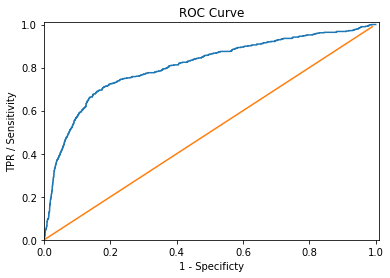

In [22]:
fpr_NB, tpr_NB, thr_NB = roc_curve(y_test, gnb_y_pred_prob)
plt.axis([0, 1.01, 0, 1.01])
plt.xlabel('1 - Specificty')
plt.ylabel('TPR / Sensitivity')
plt.title('ROC Curve')
plt.plot(fpr_NB, tpr_NB)
plt.plot(np.arange(0,1, step =0.01), np.arange(0,1, step =0.01))
plt.show()

In [23]:
import shelve

# Creamos un shelve para guardar X_train_os, Y_train_os, X_test, y_test para poder utilizarlos en la notebook 4 (modelos).

shelf = shelve.open("NB_bank");

shelf["Naive_Bayes"] = gnb

shelf.close();